In [24]:
import os
import warnings
import pathlib
import importlib
from collections import OrderedDict as odict
from mpl_toolkits.mplot3d import Axes3D
import colorsys
import itertools
import copy
import time
import tkinter
import ctypes
import platform
import subprocess
import cProfile
import pstats
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import imageio
import luxpy as lx
import math

CCT = 13295 K
Duv = 0.0233


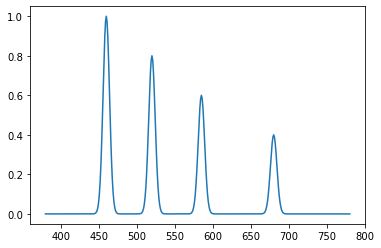

In [149]:
lambda_p1 = 460
lambda_p2 = 520
lambda_p3 = 585
lambda_p4 = 680
lambda_p = [lambda_p1, lambda_p2, lambda_p3, lambda_p4]

FWHM1 = 10
FWHM2 = 10
FWHM3 = 10
FWHM4 = 10
FWHM = [FWHM1, FWHM2, FWHM3, FWHM4]

intensity = [1, 0.8, 0.6, 0.4]

sigma = []
for i in range(len(FWHM)):
    sigma.append(FWHM[i]/(2*np.sqrt(2*np.log(2))))

wl_range = range(380,781)
spd_val = []
for lam in wl_range:
    spd_int = 0
    for i in range(len(lambda_p)):
        spd_int = spd_int + intensity[i]*math.exp(-1/2*((lam-lambda_p[i])/sigma[i])**2)
    spd_val.append(spd_int)

spd_norm = []
for i in range(len(spd_val)):
    spd_norm.append(spd_val[i] / max(spd_val))

plt.plot(wl_range, spd_norm)

XYZ = lx.spd_to_xyz([wl_range, spd_norm])
CCT = lx.xyz_to_cct(XYZ)
Duv = lx.xyz_to_duv(XYZ)

print("CCT =",np.int(CCT),"K")
print("Duv =","%.4f" % Duv)